In [24]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL


width=120
height=120


In [25]:
data=tf.data.Dataset.list_files("/Users/Georg/Downloads/lfw-deepfunneled/*/*")

In [26]:
def give_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "George_W_Bush"

def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [width, height])

def process_path(file_path):
    print(type(file_path))
    title=give_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img,title


In [27]:
labeled_ds = data.map(process_path)
type(labeled_ds)
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE=1

labeled_ds=labeled_ds.cache().prefetch(buffer_size=AUTOTUNE).batch(BATCH_SIZE)

#tensored=tf.convert_to_tensor(labeled_ds)
# labeled_ds=tf.reshape(labeled_ds,(1,120,120,3))

print((labeled_ds))


<class 'tensorflow.python.framework.ops.Tensor'>
<DatasetV1Adapter shapes: ((None, 120, 120, 3), (None,)), types: (tf.float32, tf.bool)>


In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu", input_shape=(120, 120,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (4,4), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (2,2), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 117, 117, 16)      784       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 55, 55, 16)        4112      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        4112      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 16)         

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:

model.fit(labeled_ds, epochs=2)

Epoch 1/2
13233/13233 [==============================] - 1399s 106ms/step - loss: 0.1915 - accuracy: 0.9599
Epoch 2/2
13233/13233 [==============================] - 1714s 130ms/step - loss: 0.1659 - accuracy: 0.9599


[[0.9550216  0.04497836]] 

(120, 120, 3)


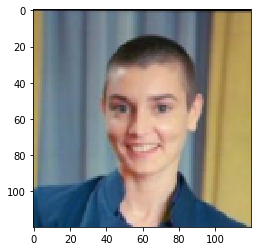

[[0.9517025  0.04829757]] 

(120, 120, 3)


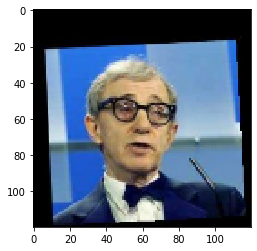

[[0.97539353 0.02460639]] 

(120, 120, 3)


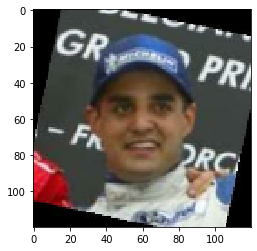

In [67]:
c=0
for elem in labeled_ds:
    print(model.predict(elem[0]),"\n")
    c+=1
    print(elem[0][0,:,:,:].shape)
    plt.imshow(elem[0][0,:,:,:])
    plt.show()
    if c==3:
        break

In [78]:
test_im=PIL.Image.open("\\Users\\Georg\\Downloads\\lfw-deepfunneled\\George_W_Bush\\George_W_Bush_0430.jpg")

In [79]:
test_im.load()
test_im=test_im.resize((120,120))

In [80]:
as_array=np.asarray(test_im,dtype="int32")

In [81]:
as_array.shape
testoo=tf.convert_to_tensor(as_array,dtype=tf.float32)
testoo=tf.reshape(testoo,(1,120,120,3))

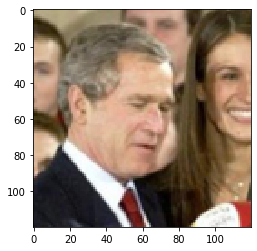

In [82]:
plt.imshow(as_array)

In [83]:
model.predict(testoo)

array([[0.9773467 , 0.02265329]], dtype=float32)